In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.3.4


In [2]:
world_bank_co2 = pd.read_excel('world_co2.xls')
world_bank_co2.head()

,country_name,country_code,region,income_group,indicater_name,indicater_code,1960,1961,1962,1963,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Latin America & Caribbean,High income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,204.631696,208.837879,226.081890,214.785217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,Low income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,...,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,...,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380
3,Albania,ALB,Europe & Central Asia,Upper middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,...,1.475652,1.572251,1.734823,1.579092,1.654524,1.806789,1.759987,1.714126,1.948872,1.939732
4,Andorra,AND,Europe & Central Asia,High income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,...,6.156688,6.157198,5.850886,5.944654,5.942801,5.807128,6.026182,6.080600,6.104134,5.973405


In [3]:
world_co2 = world_bank_co2.dropna()

In [4]:
world_co2.drop(['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980'], axis=1, inplace=True)

world_co2.columns = list(map(str, world_co2.columns))
all(isinstance(column, str) for column in world_co2.columns)

world_co2.set_index('country_name', inplace=True)
world_co2.head(2)

C:\Users\AJAY KUMAR\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,country_code,region,income_group,indicater_name,indicater_code,1981,1982,1983,1984,1985,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,South Asia,Low income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.150615,0.163104,0.201224,0.231961,0.293957,...,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
Angola,AGO,Sub-Saharan Africa,Lower middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.611133,0.519353,0.551348,0.520983,0.471903,...,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380


In [5]:
world_co2['Total']=world_co2.sum(axis=1)

print('data dimensions:', world_co2.shape)

years = list(map(str, range(1981, 2018)))

world_co2.head(2)

data dimensions: (144, 44)


<ipython-input-5-9524583e9cf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_co2['Total']=world_co2.sum(axis=1)


,country_code,region,income_group,indicater_name,indicater_code,1981,1982,1983,1984,1985,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
country_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,South Asia,Low income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.150615,0.163104,0.201224,0.231961,0.293957,...,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,6.247933
Angola,AGO,Sub-Saharan Africa,Lower middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.611133,0.519353,0.551348,0.520983,0.471903,...,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380,31.404407


# Area plots

In [6]:
world_co2.sort_values(['Total'], ascending=False, axis=0, inplace=True)

#get the top 5 entries
world_co2_top5 = world_co2.head()

#transpose the dataframe
world_co2_top5 = world_co2_top5[years].transpose()

world_co2_top5.head()

<ipython-input-6-0235ad9bbba7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_co2.sort_values(['Total'], ascending=False, axis=0, inplace=True)


country_name,Qatar,United Arab Emirates,Bahrain,Luxembourg,United States
1981,51.858866,33.610204,22.788878,25.813833,19.766764
1982,44.562881,31.654515,25.491604,24.237664,18.590495
1983,36.433002,28.769868,20.756028,22.676663,18.571544
1984,36.135754,35.854683,22.610734,24.396704,18.976750
1985,33.448178,36.544784,24.305149,24.999591,18.882313


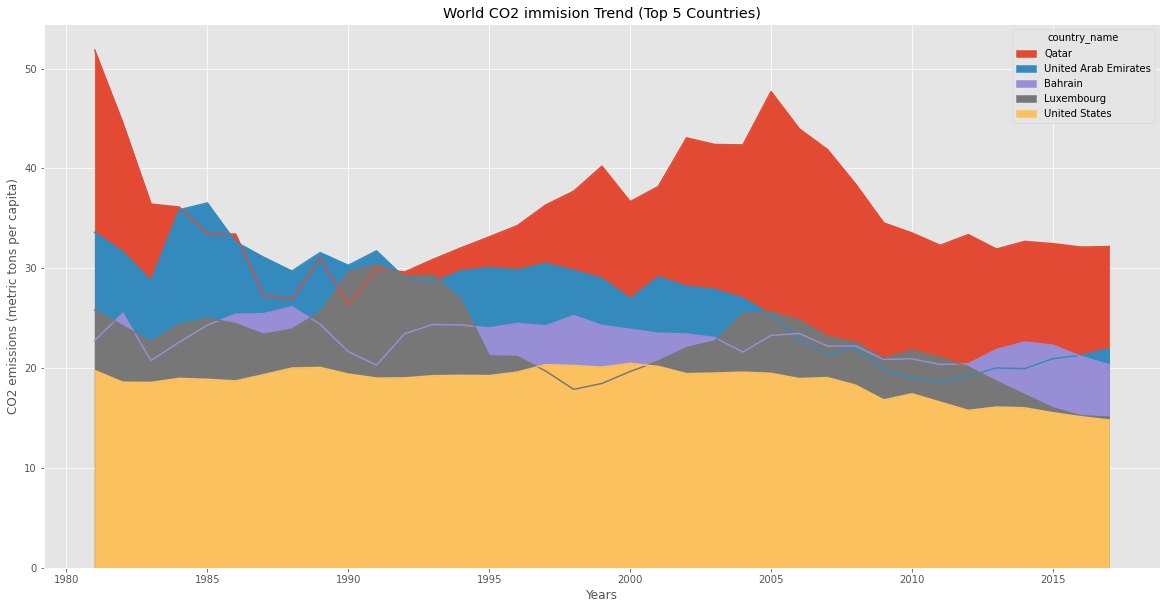

In [7]:
# let's change the index values of world_co2_top5 to type integer for plotting
world_co2_top5.index = world_co2_top5.index.map(int)
world_co2_top5.plot(kind='area',alpha=1,
 stacked=False,
 figsize=(20, 10))
plt.title('World CO2 immision Trend (Top 5 Countries)')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlabel('Years')
plt.show()

In [8]:
income_group_co2 = pd.DataFrame(world_co2.groupby(['income_group'])['Total'].agg('sum'))
income_group_co2

,Total
income_group,
High income,16670.698636
Low income,377.134635
Lower middle income,1500.994306
Upper middle income,4654.461155


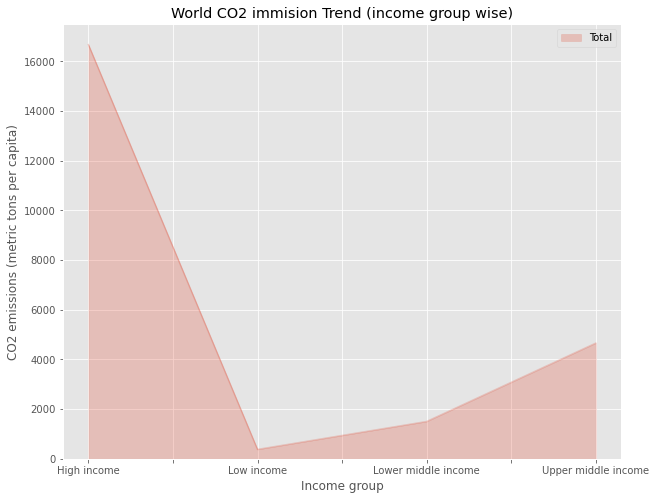

In [9]:
income_group_co2.plot(kind='area',alpha=0.25,
 stacked=False,figsize=(10, 8))
plt.title('World CO2 immision Trend (income group wise)')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlabel('Income group')
plt.show()

In [10]:
region_co2 = pd.DataFrame(world_co2.groupby(['region'])['Total'].agg('sum'))
region_co2

,Total
region,
East Asia & Pacific,4042.742327
Europe & Central Asia,7622.407880
Latin America & Caribbean,3447.672018
Middle East & North Africa,5624.964445
North America,1313.795227
South Asia,102.655618
Sub-Saharan Africa,1049.051217


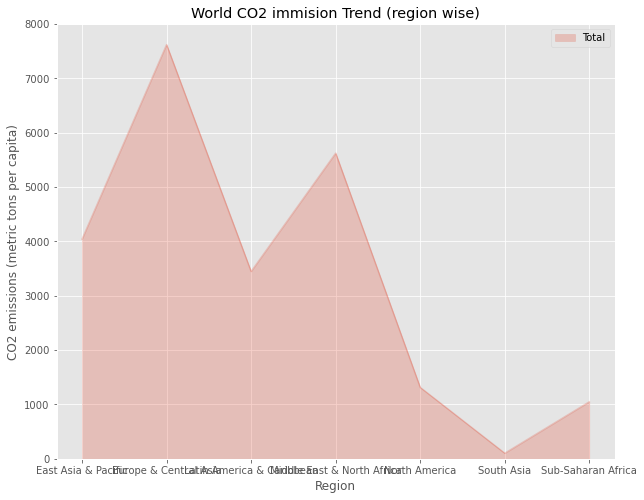

In [11]:
region_co2.plot(kind='area',alpha=0.25,
 stacked=False,figsize=(10, 8))
plt.title('World CO2 immision Trend (region wise)')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlabel('Region')
plt.show()

In [12]:
world_co2.tail()

,country_code,region,income_group,indicater_name,indicater_code,1981,1982,1983,1984,1985,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
country_name,,,,,,,,,,,,,,,,,,,,,
Uganda,UGA,Sub-Saharan Africa,Low income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.041173,0.041324,0.045170,0.041402,0.042565,...,0.118724,0.124265,0.113141,0.119626,0.128415,0.127140,0.143004,0.141863,0.143462,2.834072
Ethiopia,ETH,Sub-Saharan Africa,Low income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.051870,0.040045,0.048358,0.042282,0.044651,...,0.073825,0.083648,0.091236,0.107773,0.125695,0.127733,0.144300,0.145301,0.149051,2.655656
Central African Republic,CAF,Sub-Saharan Africa,Low income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.059917,0.061239,0.060905,0.060663,0.063469,...,0.061549,0.065631,0.067622,0.067447,0.067202,0.068994,0.068317,0.067450,0.070719,2.422888
Chad,TCD,Sub-Saharan Africa,Low income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.045312,0.043524,0.042496,0.043641,0.035264,...,0.086177,0.066338,0.069614,0.069589,0.068796,0.068741,0.070047,0.067924,0.069132,2.322883
"Congo, Dem. Rep.",COD,Sub-Saharan Africa,Low income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.139681,0.110867,0.141754,0.136129,0.121860,...,0.031906,0.037750,0.035207,0.051150,0.064934,0.037904,0.026146,0.028010,0.026169,2.113836


In [13]:
world_co2_least5 = world_co2.tail()

#transpose the dataframe
world_co2_least5 = world_co2_least5[years].transpose()

world_co2_least5.tail()

country_name,Uganda,Ethiopia,Central African Republic,Chad,"Congo, Dem. Rep."
2013,0.119626,0.107773,0.067447,0.069589,0.051150
2014,0.128415,0.125695,0.067202,0.068796,0.064934
2015,0.127140,0.127733,0.068994,0.068741,0.037904
2016,0.143004,0.144300,0.068317,0.070047,0.026146
2017,0.141863,0.145301,0.067450,0.067924,0.028010


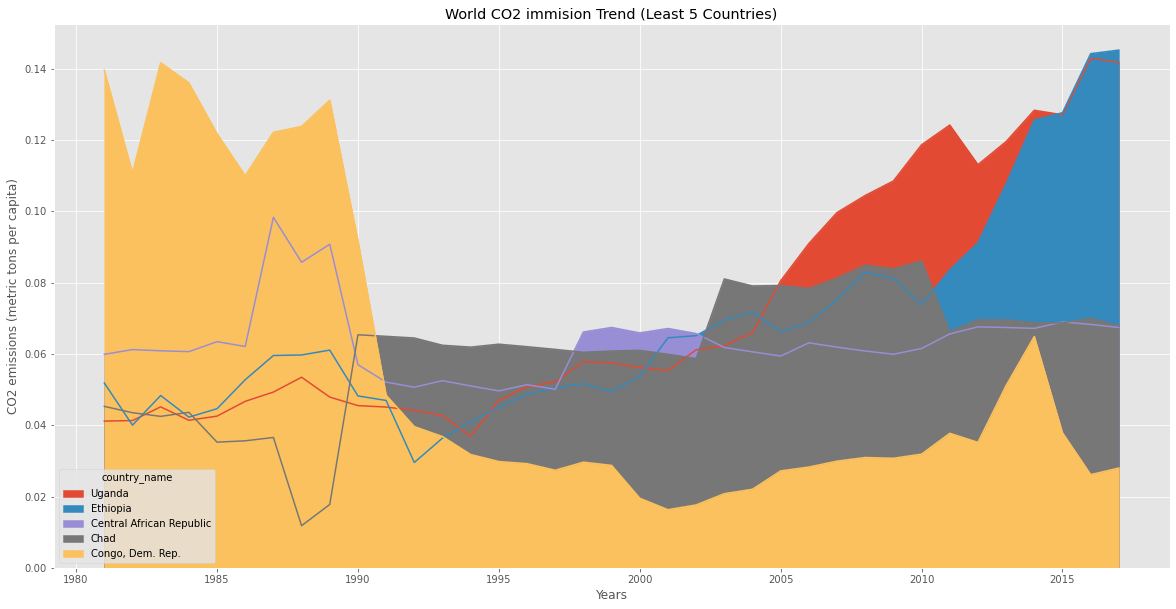

In [14]:
# let's change the index values of world_co2_least5 to type integer for plotting
world_co2_least5.index = world_co2_least5.index.map(int)
world_co2_least5.plot(kind='area',alpha=1,
 stacked=False,
 figsize=(20, 10))
plt.title('World CO2 immision Trend (Least 5 Countries)')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlabel('Years')
plt.show()